In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np 
import os 
import pandas as pd

In [3]:
reviews = pd.read_csv("./dataset.csv")
print(reviews.shape)
print(reviews.keys())
reviews.head()

(1781, 21)
Index(['URL', 'URL_LENGTH', 'NUMBER_SPECIAL_CHARACTERS', 'CHARSET', 'SERVER',
       'CONTENT_LENGTH', 'WHOIS_COUNTRY', 'WHOIS_STATEPRO', 'WHOIS_REGDATE',
       'WHOIS_UPDATED_DATE', 'TCP_CONVERSATION_EXCHANGE',
       'DIST_REMOTE_TCP_PORT', 'REMOTE_IPS', 'APP_BYTES', 'SOURCE_APP_PACKETS',
       'REMOTE_APP_PACKETS', 'SOURCE_APP_BYTES', 'REMOTE_APP_BYTES',
       'APP_PACKETS', 'DNS_QUERY_TIMES', 'Type'],
      dtype='object')


,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


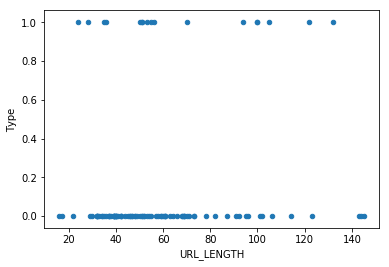

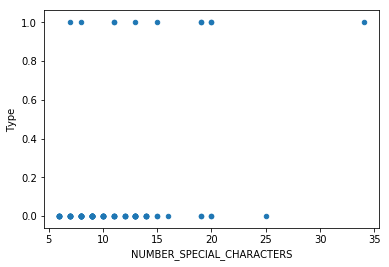

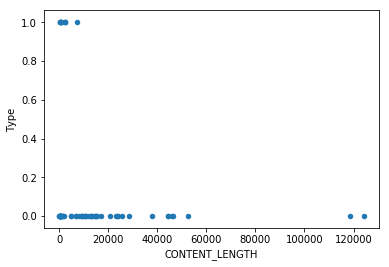

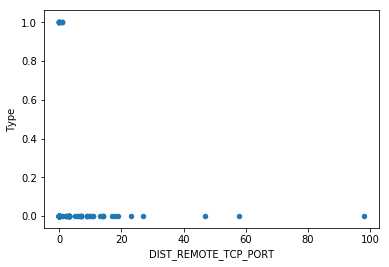

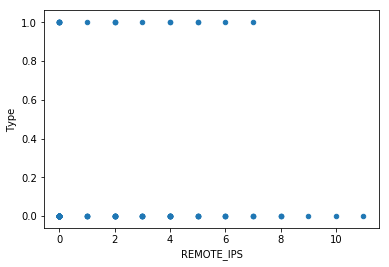

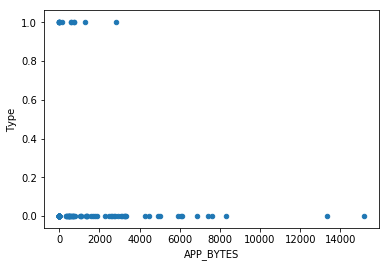

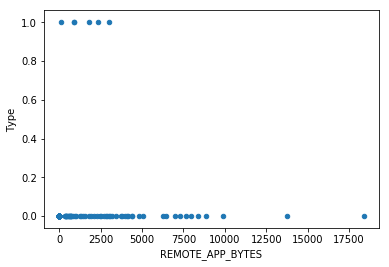

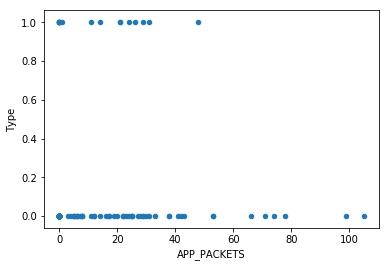

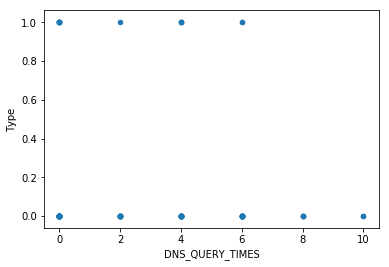

In [4]:
reviews.sample(100).plot.scatter(x='URL_LENGTH', y='Type')
reviews.sample(100).plot.scatter(x='NUMBER_SPECIAL_CHARACTERS', y='Type')
reviews.sample(100).plot.scatter(x='CONTENT_LENGTH', y='Type')
reviews.sample(100).plot.scatter(x='DIST_REMOTE_TCP_PORT', y='Type')
reviews.sample(100).plot.scatter(x='REMOTE_IPS', y='Type')
reviews.sample(100).plot.scatter(x='APP_BYTES', y='Type')
reviews.sample(100).plot.scatter(x='REMOTE_APP_BYTES', y='Type')
reviews.sample(100).plot.scatter(x='APP_PACKETS', y='Type')
reviews.sample(100).plot.scatter(x='DNS_QUERY_TIMES', y='Type')

In [5]:
reviews["Type"].value_counts()

0    1565
1     216
Name: Type, dtype: int64

In [6]:
labels = reviews["Type"]
del reviews["Type"]
data = reviews
print(data.shape)
print(labels.shape)

(1781, 20)
(1781,)


The dataset is highly imbalanced with only 12 percent data from one class and rest from other class

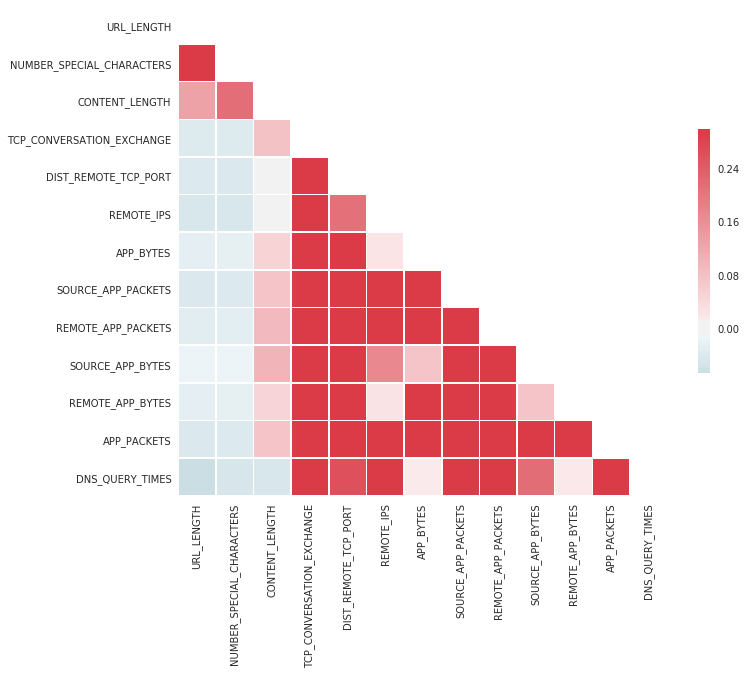

In [7]:
import seaborn as sns
sns.set(style="white")

# Generate a large random dataset
# rs = np.random.RandomState(33)
# d = pd.DataFrame(data=rs.normal(size=(100, 26)),
#                  columns=list(ascii_letters[26:]))

# reviews = 
# Compute the correlation matrix
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

# plotPerColumnDistribution(reviews, 10, 5)

In [8]:
reviews = pd.read_csv("./dataset.csv",  error_bad_lines=fa)
avg = reviews.CONTENT_LENGTH.sum()/(len(reviews)-812)
reviews.loc[reviews["CONTENT_LENGTH"].isnull(), 'CONTENT_LENGTH'] = avg
reviews = reviews.dropna()
print(reviews.isnull().any())


URL                          False
URL_LENGTH                   False
NUMBER_SPECIAL_CHARACTERS    False
CHARSET                      False
SERVER                       False
CONTENT_LENGTH               False
WHOIS_COUNTRY                False
WHOIS_STATEPRO               False
WHOIS_REGDATE                False
WHOIS_UPDATED_DATE           False
TCP_CONVERSATION_EXCHANGE    False
DIST_REMOTE_TCP_PORT         False
REMOTE_IPS                   False
APP_BYTES                    False
SOURCE_APP_PACKETS           False
REMOTE_APP_PACKETS           False
SOURCE_APP_BYTES             False
REMOTE_APP_BYTES             False
APP_PACKETS                  False
DNS_QUERY_TIMES              False
Type                         False
dtype: bool


/home/rajneesh/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/home/rajneesh/anaconda3/lib/python3.6/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


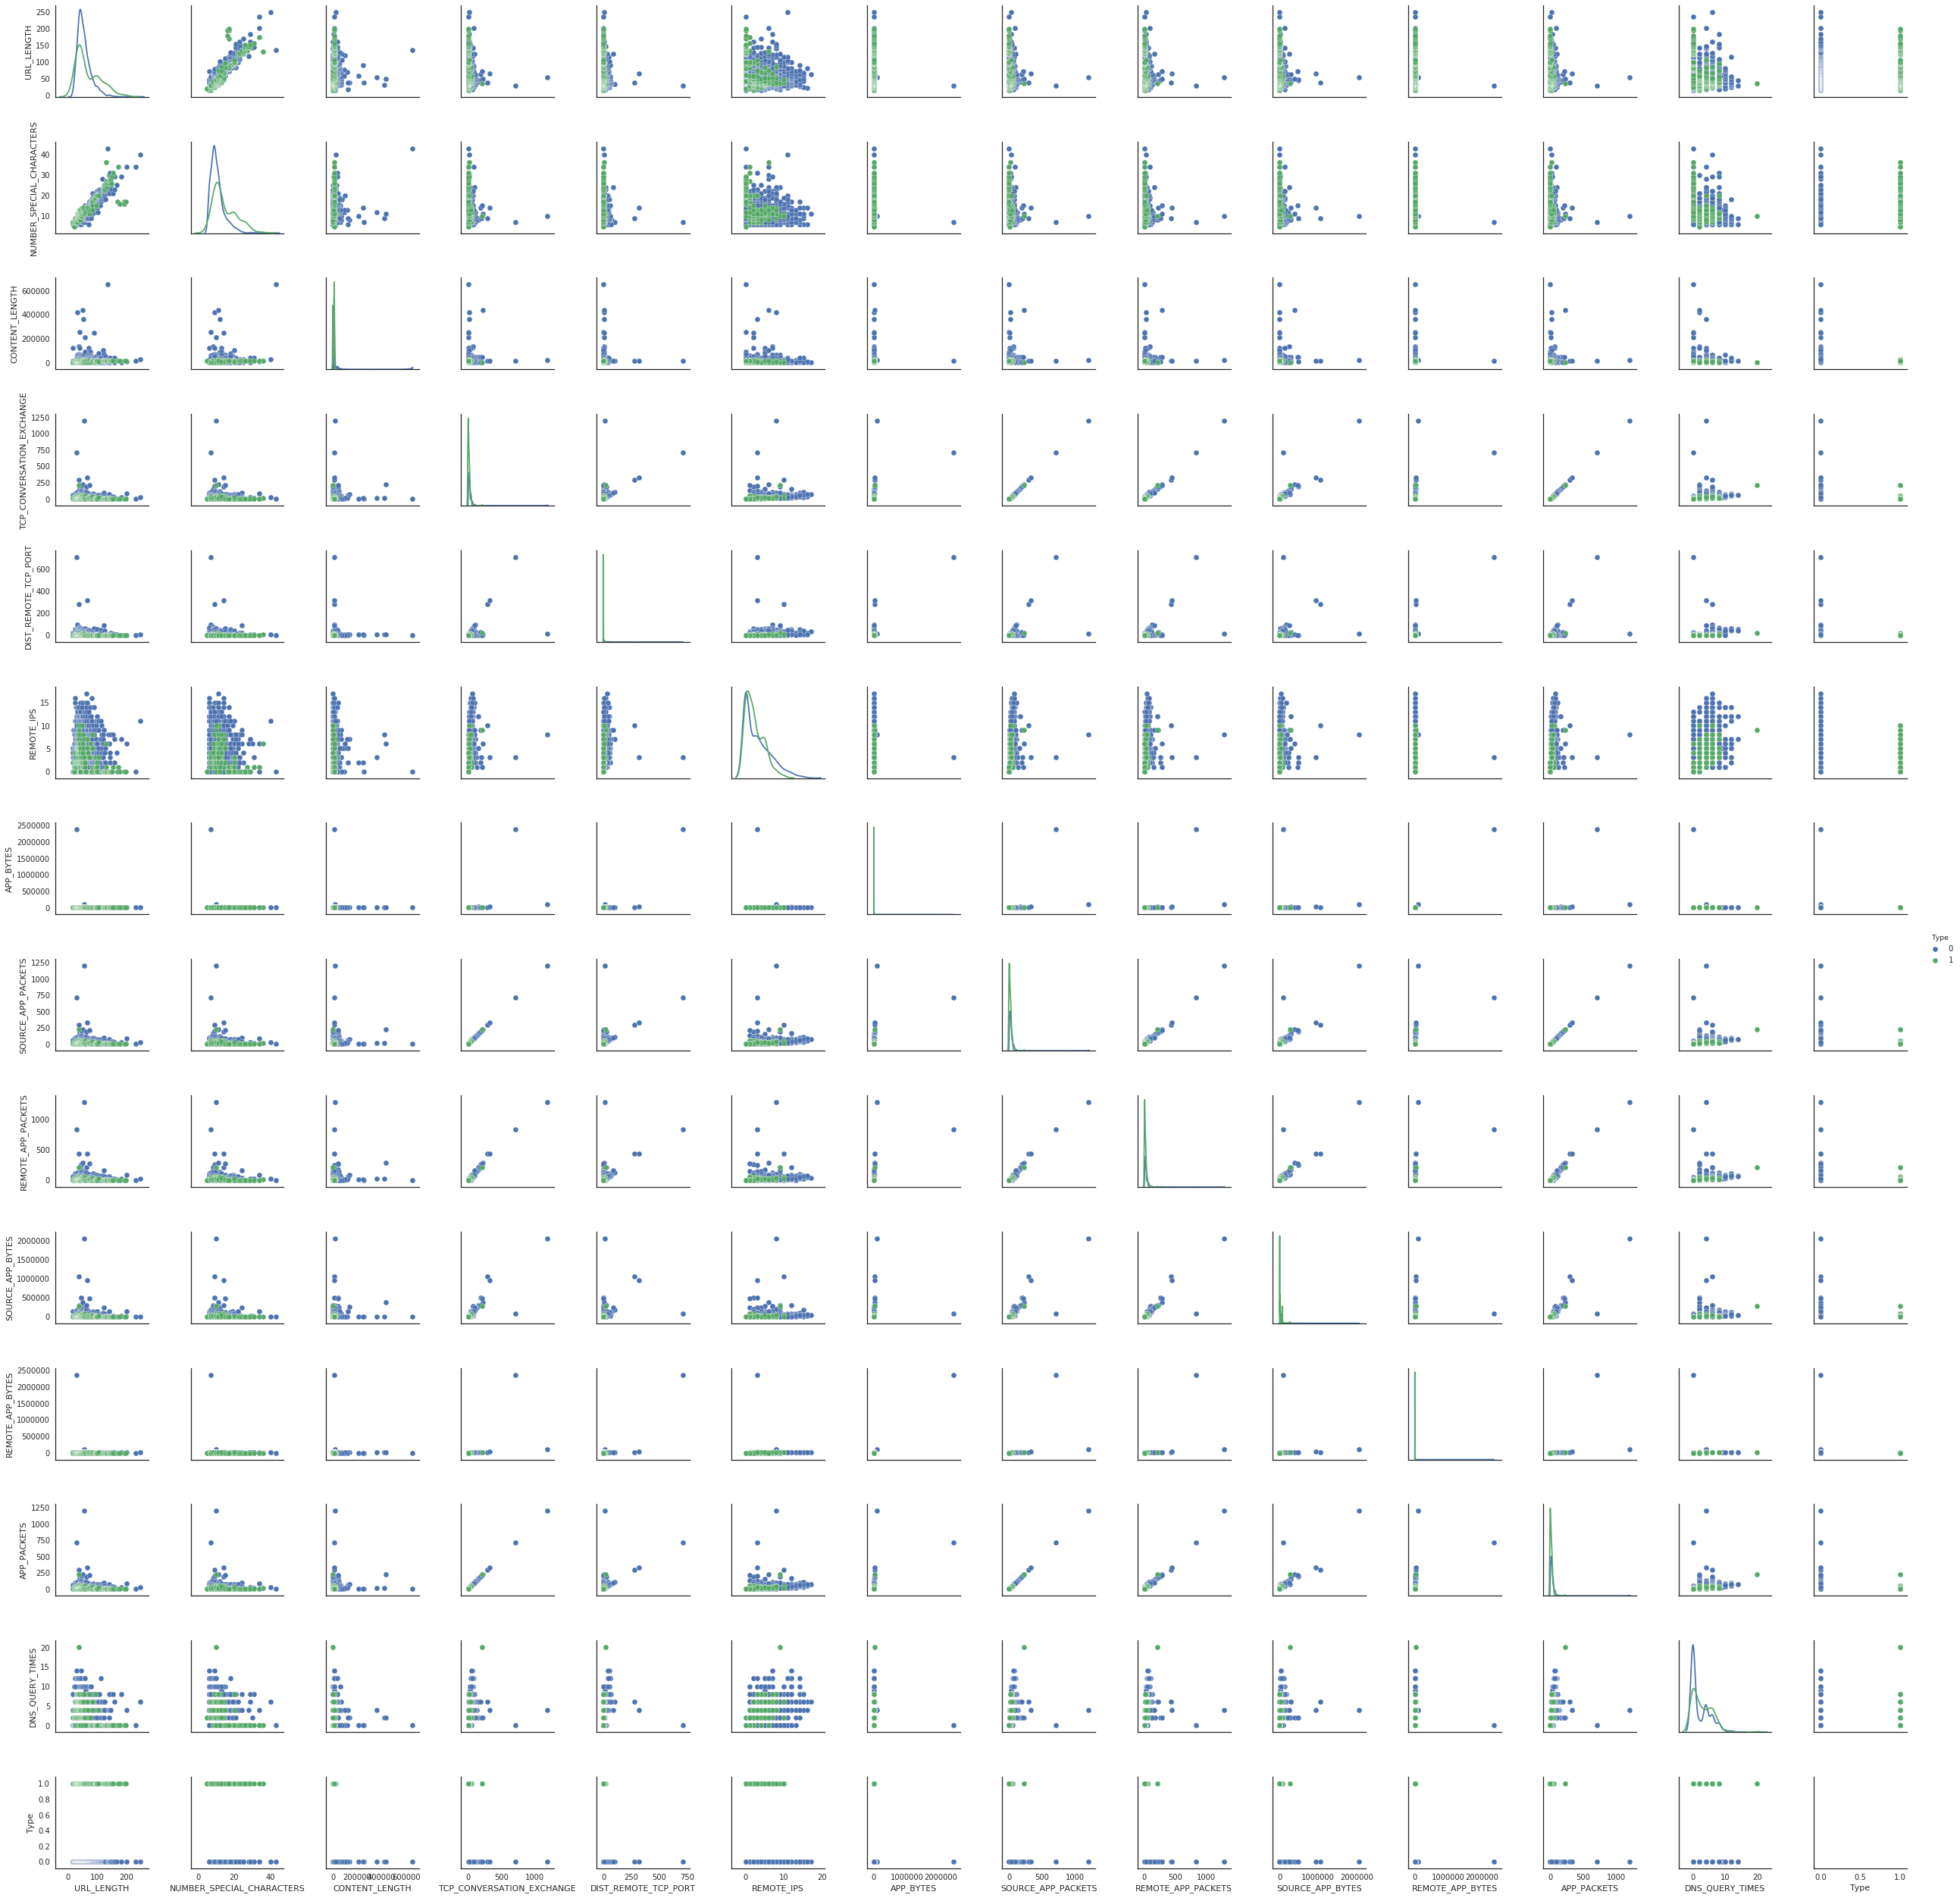

In [9]:
sns.pairplot(reviews,hue="Type", diag_kind="kde")

In [10]:
#Segregating the classes 
df = reviews
yes = df[df.Type == 1]
no = df[df.Type == 0]
print('YES : %d  No: %d'%(len(yes), len(no)))

YES : 216  No: 1563


In [13]:
# # Under sampling data for better training


# import numpy as np
# from collections import Counter
# from sklearn.model_selection import train_test_split, cross_val_score
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.metrics import confusion_matrix, classification_report
# import warnings
# #Reading the dataset


# from sklearn.ensemble import RandomForestClassifier
# from sklearn.datasets import make_classification
# labels = df["Type"]
# del df["Type"]
# X_train,X_test, Y_train, Y_test = train_test_split(df, labels, test_size = 0.2)


# clf = RandomForestClassifier(n_estimators=100, max_depth=2,
#                              random_state=0)
# clf.fit(X_train, Y_train)

# pred = clf.predict(X_test)
# print(classification_report(Y_test,pred))



ValueError: could not convert string to float: '18/12/2015 0:00'

In [14]:
df.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,7,0,2,700,9,10,1153,832,9,2.0
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,17,7,4,1230,17,19,1265,1230,17,0.0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,0,0,0,0,0,0,0,0,0,0.0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,31,22,3,3812,39,37,18784,4380,39,8.0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,57,2,5,4278,61,62,129889,4586,61,4.0
